# Details of project members

####**Name: Archana Kalburgi**
####**CWID: 10469491**
####**Name: Arya Guddemane Vishwakumar**
####**CWID: 10459529**

# **Project Title: Sentiment Analysis for IMDB Movie Reviews**
#### Part 1 
#### Part 2 in imbd.ipynb file


# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns     
import matplotlib.pyplot as plt

# Uploading file from the local storage

In [ ]:
from google.colab import files
uploaded_file = files.upload()
uploaded_file

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
!python -V

Python 3.7.10


# Uploading file from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/IMDB_Dataset.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
df2 = df.copy()
df2['sentiment'] = df2['sentiment'].replace(['positive','negative'],[1,0])

## Train Test splitting (80:20)

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
train, test = train_test_split(df2, test_size=0.2, random_state=1)

In [ ]:
train_compressed = train.sample(n=10000)
test_compressed = test.sample(n=1000) 

Text(0.5, 0, '')

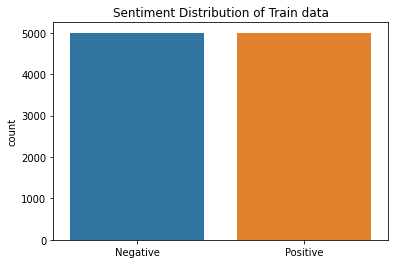

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(x = "sentiment", data=train_compressed) 
plot.set_title("Sentiment Distribution of Train data")
plot.set_xticklabels(["Negative", "Positive"]) 
plt.xlabel("")

Text(0.5, 0, '')

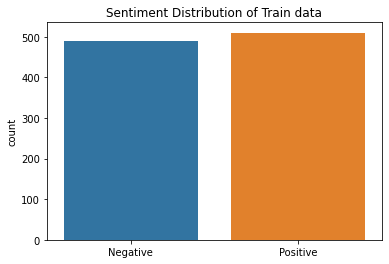

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = sns.countplot(x = "sentiment", data=test_compressed) 
plot.set_title("Sentiment Distribution of Train data")
plot.set_xticklabels(["Negative", "Positive"]) 
plt.xlabel("")

In [ ]:
clean_reviews_train = []
for rev in train_compressed['review']:
    clean_reviews_train.append(rev)

In [ ]:
clean_reviews_test = []
for review in test_compressed['review']:
    clean_reviews_test.append(review) 

In [ ]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
text = " ".join(review for review in train_compressed['review']) 
# wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure(figsize=(15,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
clean_reviews_train = vectorizer.fit_transform(clean_reviews_train)
clean_reviews_test = vectorizer.transform(clean_reviews_test)
print(clean_reviews_train)

  (0, 46585)	8
  (0, 22269)	1
  (0, 32534)	7
  (0, 43675)	1
  (0, 24282)	3
  (0, 20148)	1
  (0, 45909)	1
  (0, 16682)	2
  (0, 24067)	1
  (0, 43380)	1
  (0, 2047)	2
  (0, 35386)	1
  (0, 2213)	7
  (0, 45224)	1
  (0, 31402)	1
  (0, 35734)	1
  (0, 29558)	2
  (0, 44638)	2
  (0, 19441)	2
  (0, 8977)	2
  (0, 24719)	2
  (0, 24234)	2
  (0, 6301)	1
  (0, 24287)	1
  (0, 1815)	1
  :	:
  (9999, 40387)	1
  (9999, 2510)	1
  (9999, 14770)	1
  (9999, 43777)	1
  (9999, 25298)	1
  (9999, 14611)	1
  (9999, 46150)	1
  (9999, 3610)	1
  (9999, 19218)	1
  (9999, 40254)	2
  (9999, 51186)	1
  (9999, 40779)	1
  (9999, 34267)	1
  (9999, 202)	1
  (9999, 36800)	1
  (9999, 18793)	1
  (9999, 21078)	1
  (9999, 8423)	1
  (9999, 15170)	1
  (9999, 19842)	1
  (9999, 42200)	1
  (9999, 27583)	1
  (9999, 9661)	1
  (9999, 21579)	1
  (9999, 30582)	1


In [ ]:
clean_reviews_train_arr = clean_reviews_train.toarray()
clean_reviews_train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clean_reviews_test_arr = clean_reviews_test.toarray()
clean_reviews_test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Running data on models

## Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(clean_reviews_train, train_compressed['sentiment'])
prediction_linear = classifier_linear.predict(clean_reviews_test)

In [ ]:
SVM_accuracy = accuracy_score(test_compressed['sentiment'], prediction_linear)
SVM_accuracy

0.843

## Naive Bayes

In [ ]:
from sklearn import naive_bayes
clf = naive_bayes.MultinomialNB()
clf.fit(clean_reviews_train, train_compressed['sentiment'])
NB_predict = clf.predict(clean_reviews_test)

In [ ]:
NB_accuracy = accuracy_score(test_compressed['sentiment'], NB_predict)
NB_accuracy

0.824

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(clean_reviews_train, train_compressed['sentiment'])
kNN_predict = classifier.predict(clean_reviews_test)

In [ ]:
KNN_accuracy = accuracy_score(test_compressed['sentiment'], kNN_predict)
KNN_accuracy

0.624

### Elbow Method to find optimal k value

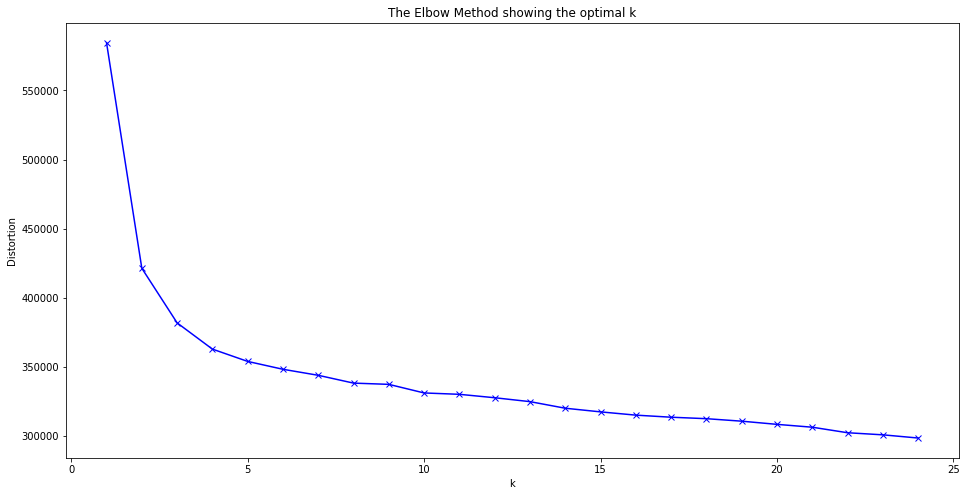

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clean_reviews_test_arr)   
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(clean_reviews_train, train_compressed['sentiment'])
rf_pred = rf.predict(clean_reviews_test)

In [ ]:
RF_accuracy = accuracy_score(test_compressed['sentiment'], rf_pred)
RF_accuracy

0.826

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_fit = LR_model.fit(clean_reviews_train, train_compressed['sentiment'])
predicts = LR_fit.predict(clean_reviews_test) 

In [ ]:
LR_accuracy = accuracy_score(test_compressed['sentiment'], predicts)
LR_accuracy

0.871

# ROC Curve for all models

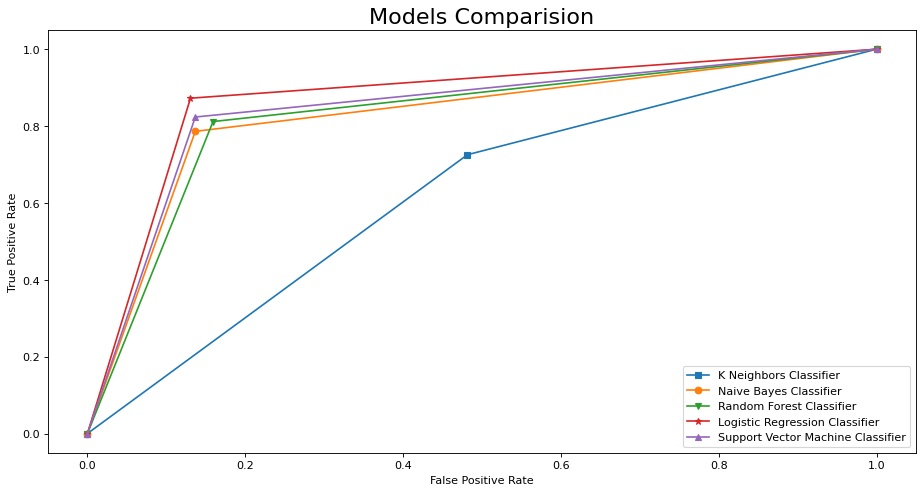

In [ ]:
# accuraccy plot 
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
from matplotlib.pyplot import figure
result3=[]

figure(num=None, figsize=(14, 7), dpi=80, facecolor='w', edgecolor='k')

knn_fpr, knn_tpr, _ = roc_curve(test_compressed["sentiment"], kNN_predict)
nb_fpr, nb_tpr, _ = roc_curve(test_compressed["sentiment"], NB_predict)
rf_fpr, rf_tpr, _ = roc_curve(test_compressed['sentiment'], rf_pred)
lr_fpr, lr_tpr, _ = roc_curve(test_compressed['sentiment'], predicts) 
svm_fpr, svm_tpr, _ = roc_curve(test_compressed['sentiment'], prediction_linear)

pyplot.plot(knn_fpr, knn_tpr, marker='s', label='K Neighbors Classifier')
pyplot.plot(nb_fpr, nb_tpr, marker='o', label='Naive Bayes Classifier')
pyplot.plot(rf_fpr, rf_tpr, marker='v', label='Random Forest Classifier')
pyplot.plot(lr_fpr, lr_tpr, marker='*', label='Logistic Regression Classifier')
pyplot.plot(svm_fpr, svm_tpr, marker='^', label='Support Vector Machine Classifier')


pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title("Models Comparision", fontsize=20)

# show the legend
pyplot.legend()
# show the plot
pyplot.show()